In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
import re
import warnings
from statistics import mode
# warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("/workspace/KordsaIntroML/datasetsforexercises/Ibrahim.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
target = df.diabetes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


/tmp/ipykernel_7259/3739203783.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 1.0, 'Boş verilerin Eğitim Setinde Dağılımı')

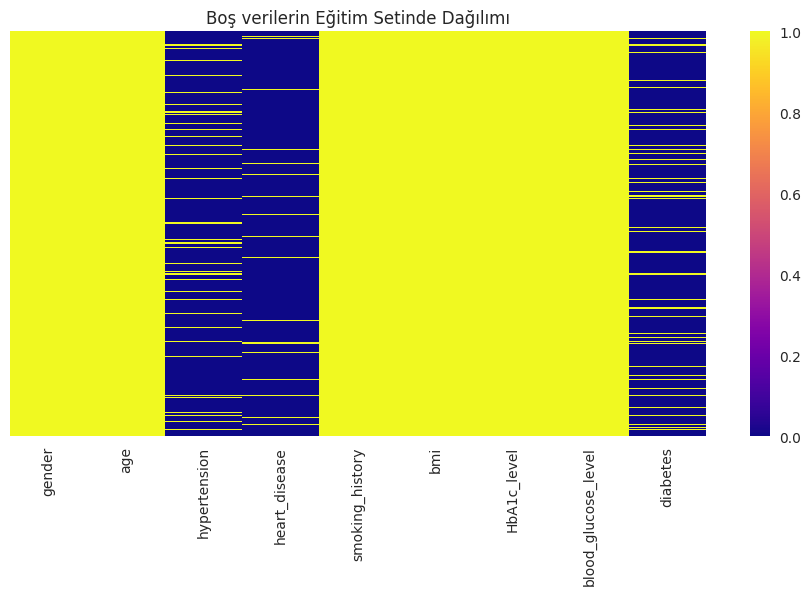

In [12]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
sns.heatmap(df[df==0].isna(),yticklabels=False,cmap='plasma')
plt.title("Boş verilerin Eğitim Setinde Dağılımı")

In [11]:
df[df==0].isna()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,True,True,False,True,True,True,True,True,False
1,True,True,False,False,True,True,True,True,False
2,True,True,False,False,True,True,True,True,False
3,True,True,False,False,True,True,True,True,False
4,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...
99995,True,True,False,False,True,True,True,True,False
99996,True,True,False,False,True,True,True,True,False
99997,True,True,False,False,True,True,True,True,False
99998,True,True,False,False,True,True,True,True,False


Text(0.5, 1.0, 'Kalp Hastaları Ve Diabet Hastaları İlişkisi')

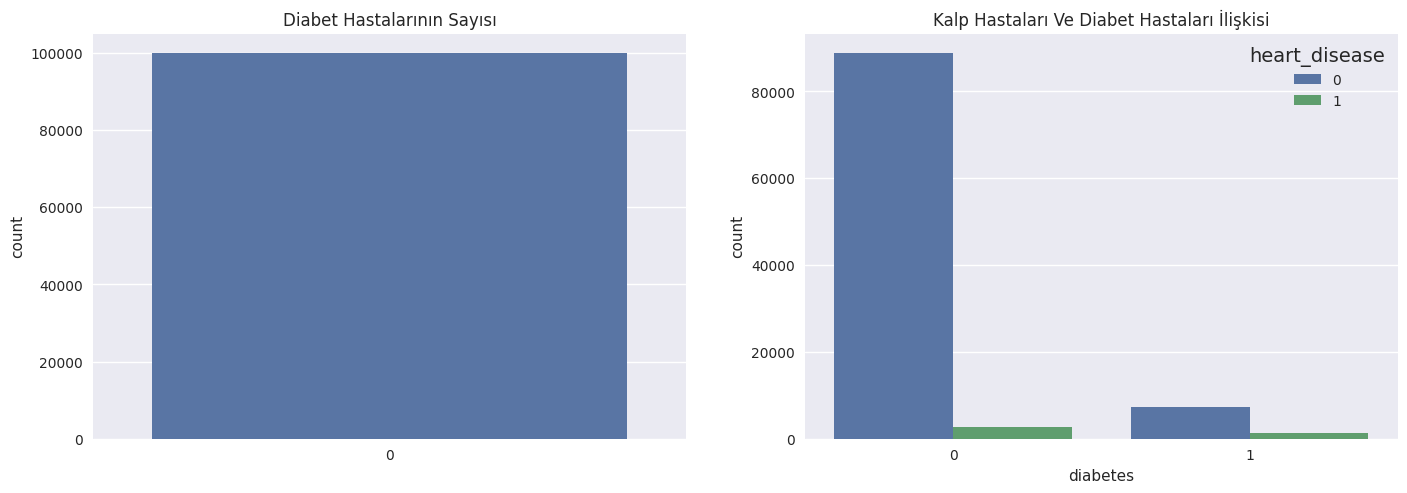

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df.diabetes)
plt.title("Diabet Hastalarının Sayısı")

plt.subplot(1,2,2)
sns.countplot(x="diabetes",hue="heart_disease",data=df)
plt.title("Kalp Hastaları Ve Diabet Hastaları İlişkisi")

Text(0.5, 1.0, 'Kalp Hastaları Ve Diabet Hastaları İlişkisi')

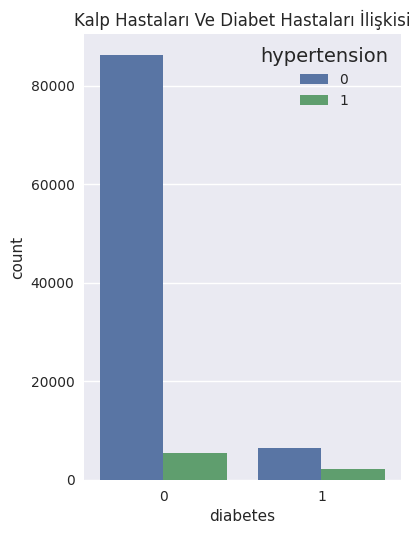

In [21]:
plt.subplot(1,2,2)
sns.countplot(x="diabetes",hue="hypertension",data=df)
plt.title("Kalp Hastaları Ve Diabet Hastaları İlişkisi")

<Figure size 2000x1500 with 0 Axes>

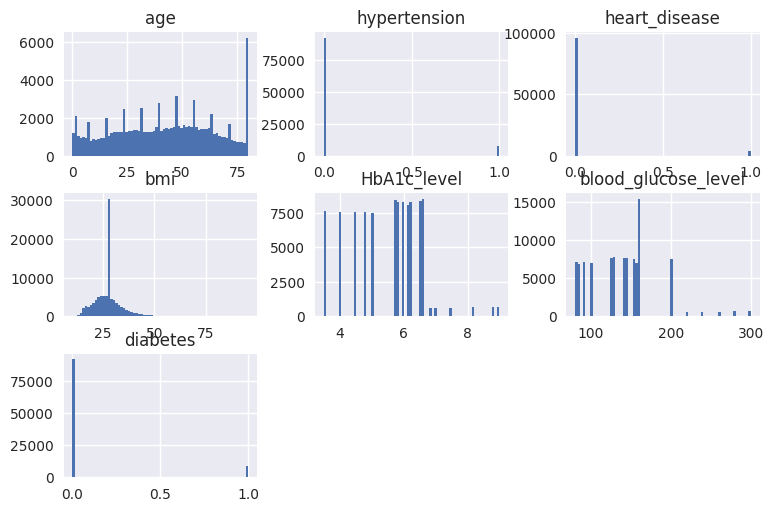

In [26]:
plt.figure(figsize=(20,15))
df.hist(bins=70);

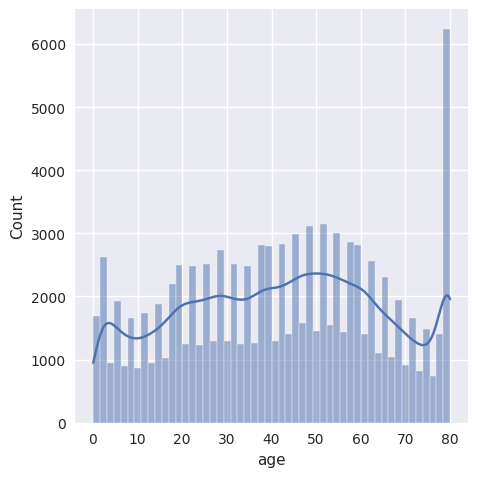

In [29]:
sns.displot(df.age,kde=True)